/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps

TOME (TOKEN MERGING) EXPERIMENTS

Testing ToMe with r=0
Evaluating...


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Results for ToMe_Baseline:
  Model               : ToMe_Baseline
  r                   : 0
  Accuracy (%)        : 77.86
  F1 (macro)          : 0.7802
  Latency (ms)        : 15.44
  Throughput (img/s)  : 64.76
  Approx Tokens       : 197.0
  GFLOPs (est)        : 16.05
  Param Memory (MB)   : 327.59
  Peak Memory (MB)    : 327.59

Testing ToMe with r=4
Evaluating...


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Results for ToMe_r4:
  Model               : ToMe_r4
  r                   : 4
  Accuracy (%)        : 77.88
  F1 (macro)          : 0.7804
  Latency (ms)        : 16.13
  Throughput (img/s)  : 61.99
  Approx Tokens       : 149.0
  GFLOPs (est)        : 12.01
  Param Memory (MB)   : 327.59
  Peak Memory (MB)    : 327.59

Testing ToMe with r=8
Evaluating...


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Results for ToMe_r8:
  Model               : ToMe_r8
  r                   : 8
  Accuracy (%)        : 77.38
  F1 (macro)          : 0.7755
  Latency (ms)        : 14.64
  Throughput (img/s)  : 68.33
  Approx Tokens       : 101.0
  GFLOPs (est)        : 8.05
  Param Memory (MB)   : 327.59
  Peak Memory (MB)    : 327.59

Testing ToMe with r=13
Evaluating...


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Results for ToMe_r13:
  Model               : ToMe_r13
  r                   : 13
  Accuracy (%)        : 76.56
  F1 (macro)          : 0.7664
  Latency (ms)        : 12.25
  Throughput (img/s)  : 81.61
  Approx Tokens       : 41.0
  GFLOPs (est)        : 3.22
  Param Memory (MB)   : 327.59
  Peak Memory (MB)    : 327.59

Testing ToMe with r=16
Evaluating...


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Results for ToMe_r16:
  Model               : ToMe_r16
  r                   : 16
  Accuracy (%)        : 74.96
  F1 (macro)          : 0.7506
  Latency (ms)        : 10.86
  Throughput (img/s)  : 92.07
  Approx Tokens       : 11.0
  GFLOPs (est)        : 0.86
  Param Memory (MB)   : 327.59
  Peak Memory (MB)    : 327.59

Testing ToMe with r=26
Evaluating...


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Results for ToMe_r26:
  Model               : ToMe_r26
  r                   : 26
  Accuracy (%)        : 51.48
  F1 (macro)          : 0.5169
  Latency (ms)        : 8.28
  Throughput (img/s)  : 120.77
  Approx Tokens       : 2.0
  GFLOPs (est)        : 0.16
  Param Memory (MB)   : 327.59
  Peak Memory (MB)    : 327.59

TOME RESULTS TABLE
        Model  r  Accuracy (%)  F1 (macro)  Latency (ms)  Throughput (img/s)  Approx Tokens  GFLOPs (est)  Param Memory (MB)  Peak Memory (MB)
ToMe_Baseline  0         77.86      0.7802         15.44               64.76          197.0         16.05             327.59            327.59
      ToMe_r4  4         77.88      0.7804         16.13               61.99          149.0         12.01             327.59            327.59
      ToMe_r8  8         77.38      0.7755         14.64               68.33          101.0          8.05             327.59            327.59
     ToMe_r13 13         76.56      0.7664         12.25               81.61         

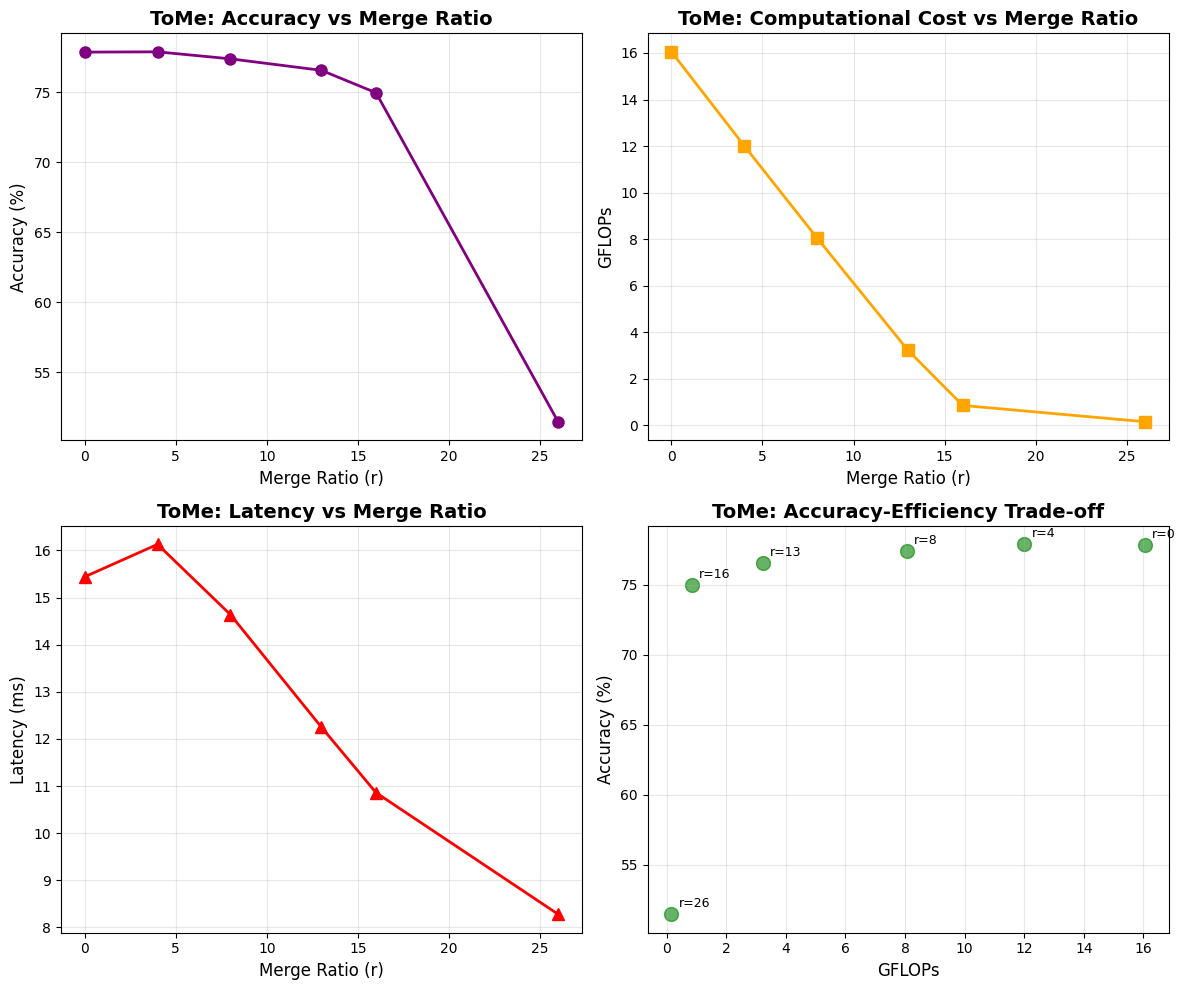

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import time
import torch
import timm
import tome
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from datasets import load_dataset
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Device
if torch.cuda.is_available():
    device = torch.device("cuda")
    num_workers = 0
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    num_workers = 0
else:
    device = torch.device("cpu")
    num_workers = 2

print(f"Using device: {device}")

# Dataset
dataset = load_dataset("clane9/imagenet-100")

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class ImageNet100Dataset(Dataset):
    def __init__(self, ds, transform):
        self.ds = ds
        self.transform = transform

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        ex = self.ds[idx]
        img = ex["image"].convert("RGB")
        return self.transform(img), ex["label"]

val_ds = ImageNet100Dataset(dataset["validation"], transform)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False,
                        num_workers=num_workers, pin_memory=True)

# Evaluation function
@torch.no_grad()
def evaluate(model):
    model.eval()
    correct = total = 0
    preds, labels = [], []
    start = time.time()

    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        out = model(x)
        p = out.argmax(dim=1)
        correct += (p == y).sum().item()
        total += y.size(0)
        preds.append(p.cpu())
        labels.append(y.cpu())

    latency = (time.time() - start) / total * 1000
    acc = 100 * correct / total
    f1 = f1_score(torch.cat(labels), torch.cat(preds), average="macro")
    throughput = 1000 / latency
    return acc, f1, latency, throughput

# Memory measurement
def measure_memory(model):
    param_mem = sum(p.numel() * p.element_size() for p in model.parameters()) / 1024**2
    
    if device.type == "cuda":
        torch.cuda.empty_cache()
        torch.cuda.reset_peak_memory_stats()
        dummy = torch.randn(16, 3, 224, 224).to(device)
        with torch.no_grad():
            _ = model(dummy)
        gpu_mem = torch.cuda.max_memory_allocated() / 1024**2
        return param_mem, gpu_mem
    else:
        return param_mem, param_mem

@torch.no_grad()
def compute_tome_metrics(model):
    """Get actual token counts by hooking into the model"""
    total_tokens_input = 0
    total_tokens_output = 0
    total_samples = 0
    
    # Hook to capture token shapes
    token_counts = {'input': [], 'output': []}
    
    def hook_fn(module, input, output):
        # Capture input and output token counts
        if isinstance(input, tuple):
            inp = input[0]
        else:
            inp = input
        
        if isinstance(inp, torch.Tensor) and len(inp.shape) == 3:
            token_counts['input'].append(inp.shape[1])
        
        if isinstance(output, torch.Tensor) and len(output.shape) == 3:
            token_counts['output'].append(output.shape[1])
    
    # Register hook on the first and last transformer block
    hooks = []
    hooks.append(model.blocks[0].register_forward_hook(hook_fn))
    
    # Run one batch to get token counts
    x, _ = next(iter(val_loader))
    x = x.to(device)
    _ = model(x)
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    # Get input tokens (from first block)
    if token_counts['input']:
        input_tokens = token_counts['input'][0]
    else:
        input_tokens = 197  # default
    
    
    token_counts_output = []
    
    def output_hook(module, input, output):
        if isinstance(output, torch.Tensor) and len(output.shape) == 3:
            token_counts_output.append(output.shape[1])
    
    hook = model.blocks[-1].register_forward_hook(output_hook)
    
    for x, _ in val_loader:
        x = x.to(device)
        B = x.size(0)
        
        token_counts_output.clear()
        _ = model(x)
        
        if token_counts_output:
            output_tokens = token_counts_output[0]
            total_tokens_output += output_tokens * B
        
        total_tokens_input += input_tokens * B
        total_samples += B
    
    hook.remove()
    
    avg_tokens_input = total_tokens_input / total_samples
    avg_tokens_output = total_tokens_output / total_samples
    
    return avg_tokens_input, avg_tokens_output

def estimate_tome_gflops(avg_tokens):
    """Estimate GFLOPs for ToMe model"""
    D, L = 768, 12
    N = avg_tokens
    flops_attn = 3 * N * D * D + 2 * N * N * D
    flops_mlp = 2 * N * D * (4 * D)
    return L * (flops_attn + flops_mlp) / 1e9

# Test ToMe with different r values
r_values = [0, 4, 8, 13, 16, 26] 
tome_results = []

print("\n" + "="*60)
print("TOME (TOKEN MERGING) EXPERIMENTS")
print("="*60)

for r in r_values:
    print(f"\n{'='*60}")
    print(f"Testing ToMe with r={r}")
    print(f"{'='*60}")
    
    # Create fresh model
    model = timm.create_model(
        "vit_base_patch16_224",
        pretrained=True,
        num_classes=100
    )
    model.load_state_dict(
        torch.load("vit_b16_imagenet100.pth", map_location="cpu")
    )
    
    # Apply ToMe patch
    tome.patch.timm(model)
    model.r = r  
    model.to(device)
    
    if r == 0:
        name = "ToMe_Baseline"
    else:
        name = f"ToMe_r{r}"
    
    print("Evaluating...")
    acc, f1, latency, throughput = evaluate(model)
    param_mem, total_mem = measure_memory(model)
    
    # Estimate tokens (approximate)
    approx_tokens_input, approx_tokens_output = compute_tome_metrics(model)
    gflops = estimate_tome_gflops(approx_tokens_output)
    
    result = {
        "Model": name,
        "r": r,
        "Accuracy (%)": round(acc, 2),
        "F1 (macro)": round(f1, 4),
        "Latency (ms)": round(latency, 2),
        "Throughput (img/s)": round(throughput, 2),
        "Approx Tokens": round(approx_tokens_output, 2),
        "GFLOPs (est)": round(gflops, 2),
        "Param Memory (MB)": round(param_mem, 2),
        "Peak Memory (MB)": round(total_mem, 2)
    }
    tome_results.append(result)
    
    print(f"\nResults for {name}:")
    for k, v in result.items():
        print(f"  {k:20s}: {v}")
    
    # Clean up
    del model
    if device.type == "cuda":
        torch.cuda.empty_cache()

# Save ToMe results
tome_df = pd.DataFrame(tome_results)
print("\n" + "="*60)
print("TOME RESULTS TABLE")
print("="*60)
print(tome_df.to_string(index=False))

tome_df.to_csv("tome_results.csv", index=False)
print("\nToMe results saved to: tome_results.csv")

# Create ToMe plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(tome_df['r'], tome_df['Accuracy (%)'], marker='o', linewidth=2, markersize=8, color='purple')
axes[0, 0].set_xlabel('Merge Ratio (r)', fontsize=12)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0, 0].set_title('ToMe: Accuracy vs Merge Ratio', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(tome_df['r'], tome_df['GFLOPs (est)'], marker='s', color='orange', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Merge Ratio (r)', fontsize=12)
axes[0, 1].set_ylabel('GFLOPs', fontsize=12)
axes[0, 1].set_title('ToMe: Computational Cost vs Merge Ratio', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(tome_df['r'], tome_df['Latency (ms)'], marker='^', color='red', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Merge Ratio (r)', fontsize=12)
axes[1, 0].set_ylabel('Latency (ms)', fontsize=12)
axes[1, 0].set_title('ToMe: Latency vs Merge Ratio', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(tome_df['GFLOPs (est)'], tome_df['Accuracy (%)'], s=100, alpha=0.6, color='green')
for i, row in tome_df.iterrows():
    axes[1, 1].annotate(f"r={row['r']}", 
                        (row['GFLOPs (est)'], row['Accuracy (%)']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1, 1].set_xlabel('GFLOPs', fontsize=12)
axes[1, 1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1, 1].set_title('ToMe: Accuracy-Efficiency Trade-off', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tome_analysis.png', dpi=300, bbox_inches='tight')
print("ToMe plot saved to: tome_analysis.png")